## **Underfitting y Overfitting**

En este notebook abordaremos un tema esencial dentro de Machine Learning:  el sobreajuste y el subajuste.

### **`Underfitting`**

Generaremos un dataset sintético

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def sample_data(size=100, x_matrix=False, min_x=-2.5, max_x=2.5):
    x = (np.random.random(size=size) - 0.5 ) * (max_x - min_x)
    x.sort() # util para graficar
    y = x ** 2 + x + np.random.normal(0, 1, size=size)
    if x_matrix:
        x = x.reshape((-1,1))
    return x, y

In [3]:
X, y = sample_data(size=100, x_matrix=True)

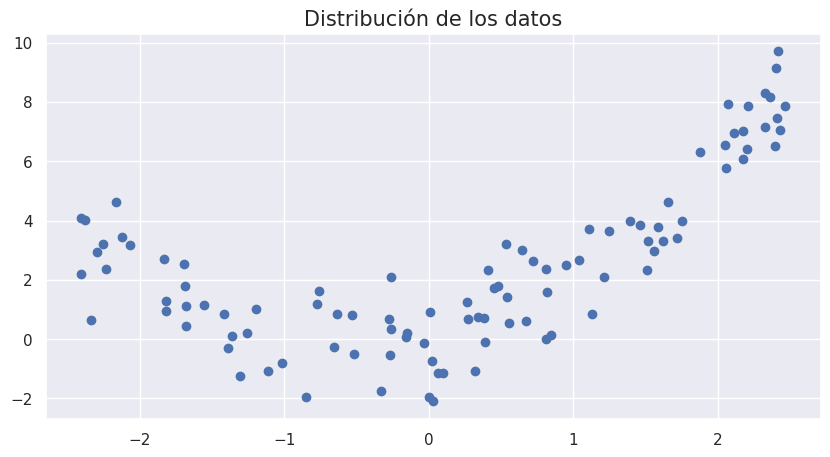

In [4]:
# Graficamos los puntos del dataset

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.title('Distribución de los datos', fontsize = 15)
plt.show()

Veamos qué pasaría si utilizáramos un modelo de regresión lineal para este tipo de distribución. A priori, ¿pensás que se ajustaría bien a nuestros datos?¿podría abstraerse o generalizar?

In [5]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() # Instanciamos nuestra regresión lineal

reg_lineal.fit(X, y) # Entrenamos

LinearRegression()

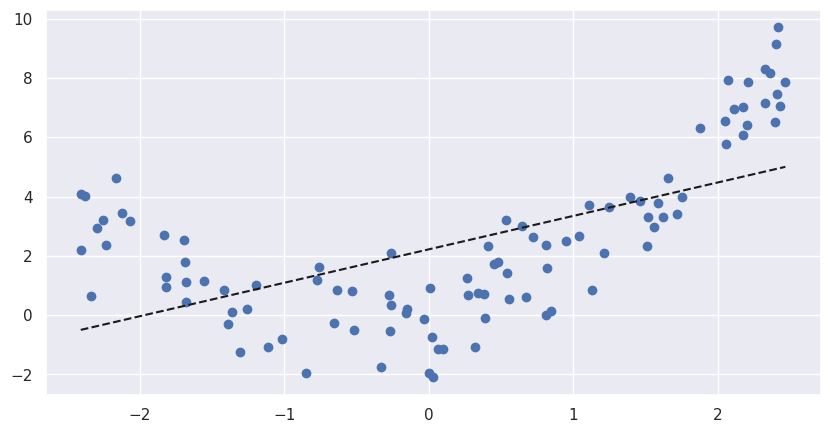

In [6]:
m, M = X.min(), X.max()

plt.figure(figsize=(10,5))
plt.plot([m, M], reg_lineal.predict([[m], [M]]), '--k')
plt.scatter(X, y)
plt.show()

Indudablemente, el **poder de abstracción** de un modelo de regresión lineal, dada una serie de datos que siguen una función cuadrática, es muy bajo. Estamos empleando un modelo muy sencillo, motivo principal de los modelos que presentan underfitting.

Para evitar este tipo de situaciones, podríamos emplear un modelo con un mayor grado de `complejidad`. Por ejemplo, a la regresión lineal le podríamos agregar atributos polinómicos -¡sí, tal como vimos en el punto 3 de la Práctica_01 de la primera clase!-.

### **`Overfitting`**

Observaremos el sobreajuste en un algoritmo que suele correr ese peligro: el árbol de decisión.

Aquí, tambíen, generaremos un dataset sintético.

In [7]:
from sklearn.datasets import make_classification

X, y = make_classification(10000, 100, n_informative=3, n_classes=2, random_state=1982)

y

array([1, 0, 0, ..., 1, 1, 1])

Separamos nuestros datos en un subset de entrenamiento y otro de testeo.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1982)

Instanciamos nuestro modelo de árbol de decisión, sin establecer un límite de profundidad (**max_depth = None**). De esta manera, el árbol continuará haciendo preguntas hasta que todas las hojas sean puras.

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier (max_depth = None, criterion='entropy')

Entrenamos

In [10]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Evaluamos su *score*

In [11]:
from sklearn.metrics import accuracy_score

print('Exactitud en el set de entrenamiento: {0: .2f}'.format(clf.score(x_train, y_train)))
print('Exactitud en el set de testeo: {0: .2f}'.format(clf.score(x_eval, y_eval)))

Exactitud en el set de entrenamiento:  1.00
Exactitud en el set de testeo:  0.92


Al dejar crecer el árbol a tal punto que cada hoja sea pura, este cae en el overfitting. Recordemos que el problema de estos modelos sobreajustados es que se **aprenden los datos de memoria**, entonces funcionan mucho mejor en el set de entrenamiento que en el set de testeo.

De esta manera, una alternativa para intentar que el modelo generalice mejor y, por lo tanto, tenga más precisión para datos que no ha visto, es tratar de reducir su complejidad por medio del control de la `profundidad` que puede alcanzar el árol.

In [12]:
# Como, al instanciar el modelo, habíamos establecido una profundidad sin límite,
# comprobamos a cuántos niveles llegó para que todas las hojas sean puras.

print('La cantidad de nodos del modelo clasificador es:' ,clf.tree_.max_depth)

La cantidad de nodos del modelo clasificador es: 23


Siguiendo la teoría, para que el modelo pueda generalizar mejor y, por ende, predecir con mayor precisión en el set de testeo, deberíamos disminuir la profundidad del árbol.

In [13]:
# Instanciamos un nuevo árbol con profundiad de 5 nodos

clf_2 = DecisionTreeClassifier(max_depth=6, criterion='entropy')

In [14]:
# Entrenamos

clf_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [15]:
# Evaluamos

print('Exactitud en el set de entrenamiento: {0: .2f}'.format(clf_2.score(x_train, y_train)))
print('Exactitud en el set de testeo: {0: .2f}'.format(clf_2.score(x_eval, y_eval)))

Exactitud en el set de entrenamiento:  0.95
Exactitud en el set de testeo:  0.94


Podemos corroborrar dos cosas:

+ La exactitud del modelo ya no es perfecta en el set de entrenamiento

+ La exactitud en el set de entrenamiento es prácticamente igual que en el set de testeo

¿Cuál es el fundamento de esta variación y mejora de nuestro nuevo modelo?

Esta diferencia se debe a que redujimos la complejidad del modelo para intentar ganar en generalización. Esto se conoce comúnmente como `criterio de poda`. Ahora bien, hay que saber hasta qué punto disminuir su complejidad. Si caemos en un modelo demasiado simple, nos iremos al otro extremo: el underfitting.

Existe una herramienta para que esto no se tenga que hacer de manera estrictamente manual y saber determinar hasta qué punto *podar el árbol*.

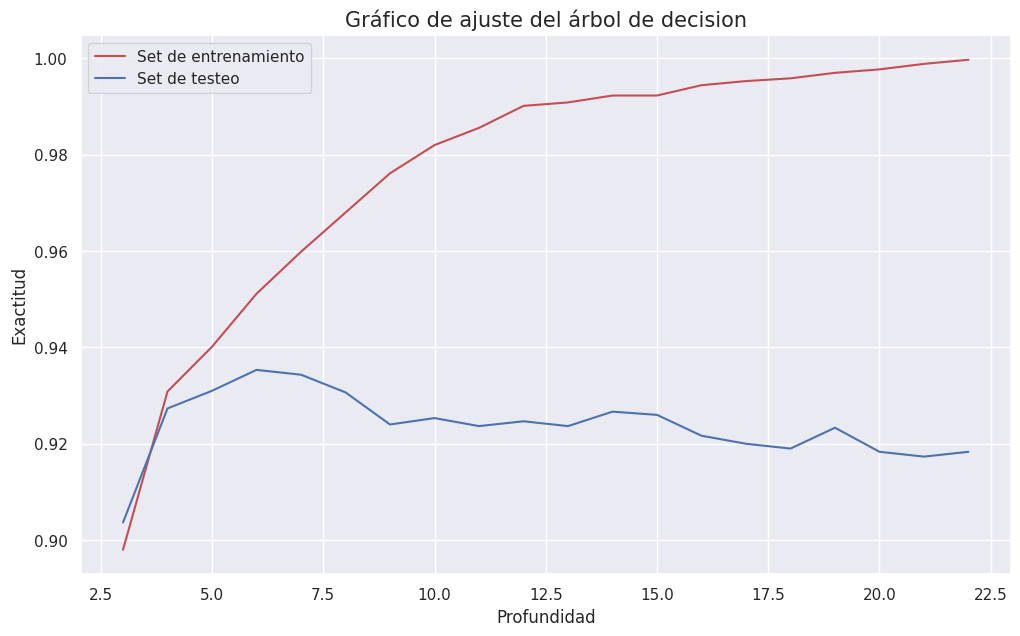

In [16]:
train_prec =  []
eval_prec = []

max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(x_train, y_train)
    train_prec.append(clf_3.score(x_train, y_train))
    eval_prec.append(clf_3.score(x_eval, y_eval))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

Podemos ver que el punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 6 nodos; a partir de allí, el modelo pierde en generalización y comienza a sobreajustar.